In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('./data/after_preprocessing/final.csv',encoding='utf-8',index_col=0)
df.head()
x = df.drop(['Name','Host ID','Host Since','Price'],axis=1)
y = df.Price

In [3]:
x_dev, x_test, y_dev, y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=42)
st = StandardScaler()
x_dev_st = st.fit_transform(x_dev)
x_test_st = st.transform(x_test)

ri = Ridge(random_state=42)
ri.fit(x_dev_st,y_dev)
predict = ri.predict(x_test_st)
metrics.mean_absolute_error(y_test,predict)


50.32912850693795

In [27]:
param_set1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)}

gsearch1 = model_selection.GridSearchCV(estimator = XGBRegressor(tree_method='gpu_hist',predictor='gpu_predictor'
                                                                 ,random_state=42), 
                                        param_grid = param_set1, 
                                        scoring='neg_mean_absolute_error',cv=5, verbose=5)

gsearch1.fit(x_dev_st,y_dev)
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .max_depth=3, min_child_weight=1;, score=-40.311 total time=  12.2s
[CV 2/5] END .max_depth=3, min_child_weight=1;, score=-40.117 total time=  12.4s
[CV 3/5] END .max_depth=3, min_child_weight=1;, score=-40.136 total time=  12.7s
[CV 4/5] END .max_depth=3, min_child_weight=1;, score=-40.713 total time=  12.6s
[CV 5/5] END .max_depth=3, min_child_weight=1;, score=-40.575 total time=  12.7s
[CV 1/5] END .max_depth=3, min_child_weight=3;, score=-40.419 total time=  12.6s
[CV 2/5] END .max_depth=3, min_child_weight=3;, score=-40.244 total time=  12.5s
[CV 3/5] END .max_depth=3, min_child_weight=3;, score=-40.166 total time=  12.6s
[CV 4/5] END .max_depth=3, min_child_weight=3;, score=-40.785 total time=  12.5s
[CV 5/5] END .max_depth=3, min_child_weight=3;, score=-40.574 total time=  12.7s
[CV 1/5] END .max_depth=3, min_child_weight=5;, score=-40.438 total time=  12.7s
[CV 2/5] END .max_depth=3, min_child_weight=5;, 

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [28]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 5}, -37.982200633362616)

In [31]:
max_depth = gsearch1.best_params_['max_depth']
min_child_weight = gsearch1.best_params_['min_child_weight']

param_set2 = {'gamma':[i/10.0 for i in range(0,20)]}

gsearch2 = model_selection.GridSearchCV(estimator = XGBRegressor(tree_method='gpu_hist',predictor='gpu_predictor',
                                                                 max_depth=max_depth,
                                                                 min_child_weight=min_child_weight,random_state=42,n_jobs=-1), 
                                        param_grid = param_set2, 
                                        scoring='neg_mean_absolute_error',cv=5, verbose=5)

gsearch2.fit(x_dev_st,y_dev)
gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......................gamma=0.0;, score=-37.726 total time=   5.0s
[CV 2/5] END .......................gamma=0.0;, score=-37.834 total time=  19.6s
[CV 3/5] END .......................gamma=0.0;, score=-37.789 total time=  14.6s
[CV 4/5] END .......................gamma=0.0;, score=-38.471 total time=  14.5s
[CV 5/5] END .......................gamma=0.0;, score=-38.091 total time=  14.4s
[CV 1/5] END .......................gamma=0.1;, score=-37.726 total time=  14.2s
[CV 2/5] END .......................gamma=0.1;, score=-37.834 total time=  14.4s
[CV 3/5] END .......................gamma=0.1;, score=-37.789 total time=  14.6s
[CV 4/5] END .......................gamma=0.1;, score=-38.471 total time=  14.6s
[CV 5/5] END .......................gamma=0.1;, score=-38.091 total time=  14.5s
[CV 1/5] END .......................gamma=0.2;, score=-37.726 total time=  14.4s
[CV 2/5] END .......................gamma=0.2;,

({'gamma': 1.0}, -37.98219294903013)

In [42]:
gamma = gsearch2.best_params_['gamma']

param_set3 = {
    'subsample':[i/10.0 for i in [9,9.2,9.4,9.6]],
    'colsample_bytree':[i/10.0 for i in range(1,7)]
}

#param_set3 = {
#    'subsample':[i/10.0 for i in range(6,10)],
#    'colsample_bytree':[i/10.0 for i in range(6,10)]
#}

gsearch3 = model_selection.GridSearchCV(estimator = XGBRegressor(tree_method='gpu_hist',predictor='gpu_predictor',
                                                                 max_depth=max_depth,gamma=gamma,
                                                                 min_child_weight=min_child_weight,random_state=42,n_jobs=-1), 
                                        param_grid = param_set3, 
                                        scoring='neg_mean_absolute_error',cv=5, verbose=5)

gsearch3.fit(x_dev_st,y_dev)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END colsample_bytree=0.1, subsample=0.9;, score=-40.188 total time=   9.3s
[CV 2/5] END colsample_bytree=0.1, subsample=0.9;, score=-40.255 total time=   9.0s
[CV 3/5] END colsample_bytree=0.1, subsample=0.9;, score=-40.318 total time=   9.0s
[CV 4/5] END colsample_bytree=0.1, subsample=0.9;, score=-40.855 total time=   9.2s
[CV 5/5] END colsample_bytree=0.1, subsample=0.9;, score=-40.579 total time=   8.8s
[CV 1/5] END colsample_bytree=0.1, subsample=0.9199999999999999;, score=-40.143 total time=   8.9s
[CV 2/5] END colsample_bytree=0.1, subsample=0.9199999999999999;, score=-40.219 total time=   9.0s
[CV 3/5] END colsample_bytree=0.1, subsample=0.9199999999999999;, score=-40.184 total time=   9.4s
[CV 4/5] END colsample_bytree=0.1, subsample=0.9199999999999999;, score=-40.836 total time=   8.9s
[CV 5/5] END colsample_bytree=0.1, subsample=0.9199999999999999;, score=-40.550 total time=   9.1s
[CV 1/5] END colsample_

[CV 5/5] END colsample_bytree=0.5, subsample=0.9199999999999999;, score=-38.538 total time=  11.3s
[CV 1/5] END colsample_bytree=0.5, subsample=0.9400000000000001;, score=-38.113 total time=  11.5s
[CV 2/5] END colsample_bytree=0.5, subsample=0.9400000000000001;, score=-37.907 total time=  11.6s
[CV 3/5] END colsample_bytree=0.5, subsample=0.9400000000000001;, score=-38.074 total time=  11.7s
[CV 4/5] END colsample_bytree=0.5, subsample=0.9400000000000001;, score=-38.852 total time=  11.3s
[CV 5/5] END colsample_bytree=0.5, subsample=0.9400000000000001;, score=-38.399 total time=  11.2s
[CV 1/5] END colsample_bytree=0.5, subsample=0.96;, score=-38.068 total time=  11.5s
[CV 2/5] END colsample_bytree=0.5, subsample=0.96;, score=-38.020 total time=  11.2s
[CV 3/5] END colsample_bytree=0.5, subsample=0.96;, score=-38.093 total time=  11.2s
[CV 4/5] END colsample_bytree=0.5, subsample=0.96;, score=-38.732 total time=  11.5s
[CV 5/5] END colsample_bytree=0.5, subsample=0.96;, score=-38.244 

({'colsample_bytree': 0.6, 'subsample': 0.96}, -38.10391001089282)

In [34]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, -38.10948656859024)

In [43]:
subsample = gsearch3.best_params_['subsample']
colsample_bytree = gsearch3.best_params_['colsample_bytree']

param_set4 = {
    'reg_alpha':[0,1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10,50, 100]
}

gsearch4 = model_selection.GridSearchCV(estimator = XGBRegressor(tree_method='gpu_hist',predictor='gpu_predictor',
                                                                 max_depth=max_depth,gamma=gamma,
                                                                 min_child_weight=min_child_weight,random_state=42,
                                                                subsample=subsample,colsample_bytree=colsample_bytree,
                                                                n_jobs=-1), 
                                        param_grid = param_set4, 
                                        scoring='neg_mean_absolute_error',cv=5, verbose=5)

gsearch4.fit(x_dev_st,y_dev)
gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................reg_alpha=0;, score=-38.013 total time=  11.5s
[CV 2/5] END .....................reg_alpha=0;, score=-37.718 total time=  11.9s
[CV 3/5] END .....................reg_alpha=0;, score=-37.869 total time=  11.9s
[CV 4/5] END .....................reg_alpha=0;, score=-38.666 total time=  11.9s
[CV 5/5] END .....................reg_alpha=0;, score=-38.254 total time=  11.9s
[CV 1/5] END .................reg_alpha=1e-05;, score=-38.013 total time=  11.5s
[CV 2/5] END .................reg_alpha=1e-05;, score=-37.718 total time=  12.1s
[CV 3/5] END .................reg_alpha=1e-05;, score=-37.869 total time=  11.9s
[CV 4/5] END .................reg_alpha=1e-05;, score=-38.666 total time=  11.7s
[CV 5/5] END .................reg_alpha=1e-05;, score=-38.254 total time=  11.7s
[CV 1/5] END ................reg_alpha=0.0001;, score=-38.013 total time=  11.6s
[CV 2/5] END ................reg_alpha=0.0001;, 

({'reg_alpha': 100}, -38.02310000682625)

In [49]:
reg_alpha = gsearch4.best_params_['reg_alpha']

param_set5 = {
    'learning_rate':[0.08, 0.1,0.12,0.15],
    'n_estimators':[400,500,600]
}

gsearch5 = model_selection.GridSearchCV(estimator = XGBRegressor(tree_method='gpu_hist',predictor='gpu_predictor',
                                                                 max_depth=max_depth,gamma=gamma,
                                                                 min_child_weight=min_child_weight,random_state=42,
                                                                subsample=subsample,colsample_bytree=colsample_bytree,
                                                                n_jobs=-1,reg_alpha=reg_alpha), 
                                        param_grid = param_set5, 
                                        scoring='neg_mean_absolute_error',cv=5, verbose=5)

gsearch5.fit(x_dev_st,y_dev)
gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.08, n_estimators=400;, score=-36.495 total time=  44.6s
[CV 2/5] END learning_rate=0.08, n_estimators=400;, score=-36.421 total time=  44.5s
[CV 3/5] END learning_rate=0.08, n_estimators=400;, score=-36.583 total time=  44.4s
[CV 4/5] END learning_rate=0.08, n_estimators=400;, score=-37.117 total time=  45.2s
[CV 5/5] END learning_rate=0.08, n_estimators=400;, score=-36.750 total time=  44.9s
[CV 1/5] END learning_rate=0.08, n_estimators=500;, score=-36.316 total time=  55.2s
[CV 2/5] END learning_rate=0.08, n_estimators=500;, score=-36.301 total time=  54.4s
[CV 3/5] END learning_rate=0.08, n_estimators=500;, score=-36.476 total time=  54.9s
[CV 4/5] END learning_rate=0.08, n_estimators=500;, score=-37.020 total time=  55.8s
[CV 5/5] END learning_rate=0.08, n_estimators=500;, score=-36.594 total time=  54.8s
[CV 1/5] END learning_rate=0.08, n_estimators=600;, score=-36.218 total time= 1.1min
[CV 

({'learning_rate': 0.08, 'n_estimators': 600}, -36.45374240712551)

In [48]:
gsearch5.best_params_, gsearch5.best_score_

({'learning_rate': 0.1, 'n_estimators': 400}, -36.61043600523409)

In [50]:
learning_rate = gsearch5.best_params_['learning_rate']
n_estimators = gsearch5.best_params_['n_estimators']

xgb = XGBRegressor(tree_method='gpu_hist',predictor='gpu_predictor',max_depth=max_depth,gamma=gamma,
                          min_child_weight=min_child_weight,random_state=42,subsample=subsample,
                          colsample_bytree=colsample_bytree,n_jobs=-1,reg_alpha=reg_alpha,
                          learning_rate=learning_rate,n_estimators=n_estimators)
xgb.fit(x_dev_st, y_dev)
predictions = xgb.predict(x_test_st)
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(metrics.r2_score(y_test,predictions))
print(metrics.mean_absolute_percentage_error(y_test,predictions))

36.180695479388696
4239.675618493808
0.7315172673146424
54070918395576.1


In [53]:
print('tree_method=gpu_hist','predictor:','gpu_predictor','max_depth',max_depth,'gamma',gamma,
                          'min_child_weight',min_child_weight,'random_state',42,'subsample',subsample,
                          'colsample_bytree',colsample_bytree,'n_jobs',-1,'reg_alpha',reg_alpha,
                          'learning_rate',learning_rate,'n_estimators',n_estimators)

tree_method=gpu_hist predictor: gpu_predictor max_depth 7 gamma 1.0 min_child_weight 5 random_state 42 subsample 0.96 colsample_bytree 0.6 n_jobs -1 reg_alpha 100 learning_rate 0.08 n_estimators 600


In [4]:
xgb = XGBRegressor(tree_method='gpu_hist',predictor='gpu_predictor',max_depth=7,gamma=1.0,
                          min_child_weight=5,random_state=42,subsample=0.96,
                          colsample_bytree=0.6,n_jobs=-1,reg_alpha=100,
                          learning_rate=0.08,n_estimators=600)
xgb.fit(x_dev_st, y_dev)
predictions = xgb.predict(x_test_st)
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(metrics.r2_score(y_test,predictions))
print(metrics.mean_absolute_percentage_error(y_test,predictions))

36.180695479388696
4239.675618493808
0.7315172673146424
54070918395576.1


In [11]:
sorted(list(zip(x_dev.columns,xgb.feature_importances_)),key=lambda x:x[1],reverse=True)

[('Room Type', 0.16638063),
 ('Bedrooms', 0.081406094),
 ('Bathrooms', 0.06698384),
 ('Accommodates', 0.061999135),
 ('Zipcode', 0.035617534),
 ('Beds', 0.034626126),
 ('elevator in building', 0.019083522),
 ('State', 0.019057378),
 ('Country', 0.015901102),
 ('City', 0.014754138),
 ('Extra People', 0.014668597),
 ('Review Scores Location', 0.012784378),
 ('Number of Reviews', 0.012464548),
 ('Host Response Time', 0.012323665),
 ('Property Type', 0.012124726),
 ('cable tv', 0.01090748),
 ('cleaning before checkout', 0.010812915),
 ('buzzer/wireless intercom', 0.009843175),
 ('Guests Included', 0.009518184),
 ('Availability 60', 0.009446002),
 ('tv', 0.009127919),
 ('Availability 90', 0.008790022),
 ('doorman', 0.008634468),
 ('air conditioning', 0.008522874),
 ('wireless internet', 0.008207075),
 ('doorman entry', 0.008163188),
 ('indoor fireplace', 0.007983646),
 ('Reviews per Month', 0.0074805613),
 ('pool', 0.007150539),
 ('Cancellation Policy', 0.0067959353),
 ('free parking on pre

In [22]:
outcome = pd.DataFrame({'predictions':predictions,'true':y_test}).reset_index().drop(['ID'],axis=1)

In [24]:
outcome

,predictions,true
0,102.234116,60.0
1,178.942642,280.0
2,73.568832,118.0
3,276.943024,550.0
4,34.608395,25.0
...,...,...
51253,56.620724,55.0
51254,91.539398,94.0
51255,160.509979,175.0
51256,106.060707,85.0


<AxesSubplot:>

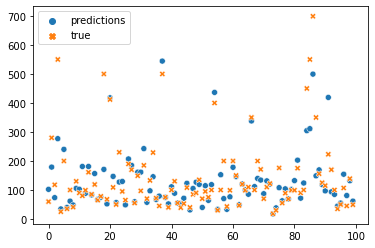

In [34]:
sns.scatterplot(data=outcome[:100])

<AxesSubplot:>

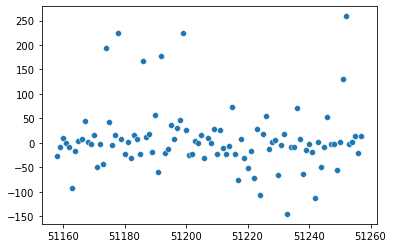

In [33]:
sns.scatterplot(data=outcome.iloc[-100:,1]-outcome.iloc[-100:,0])